# 1. IMDb Sentiment Classification Project
This project classifies IMDb titles into "Top Rated" and "Worst Rated" categories based on features like genres, votes, and release year. Various machine learning models are compared for accuracy, precision, and F1-score.

DATASET:
https://www.kaggle.com/datasets/octopusteam/full-imdb-dataset


# 2. Import Libraries


In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns


# 3. Data Preprocessing
This section includes:
1. Loading the dataset.
2. Handling missing values.
3. One-hot encoding of categorical features.
4. Normalizing numerical features.
5. Splitting the data into training and testing sets.

In [ ]:
# Load dataset
data = pd.read_csv("/content/data.csv")


In [ ]:
print("Dataset Overview:")
print(f"Number of Rows: {data.shape[0]}")
print(f"Number of Columns: {data.shape[1]}")
print(data.info())
data.head()


Dataset Overview:
Number of Rows: 1031160
Number of Columns: 7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031160 entries, 0 to 1031159
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1031160 non-null  object 
 1   title          1031158 non-null  object 
 2   type           1031160 non-null  object 
 3   genres         930428 non-null   object 
 4   averageRating  440232 non-null   float64
 5   numVotes       440232 non-null   float64
 6   releaseYear    902397 non-null   float64
dtypes: float64(3), object(4)
memory usage: 55.1+ MB
None


,id,title,type,genres,averageRating,numVotes,releaseYear
0,tt0000009,Miss Jerry,movie,Romance,5.4,215.0,1894.0
1,tt0000147,The Corbett-Fitzsimmons Fight,movie,"Documentary, News, Sport",5.2,539.0,1897.0
2,tt0000502,Bohemios,movie,NaN,4.4,18.0,1905.0
3,tt0000574,The Story of the Kelly Gang,movie,"Action, Adventure, Biography",6.0,941.0,1906.0
4,tt0000591,The Prodigal Son,movie,Drama,5.7,28.0,1907.0


In [ ]:
# Check for missing values
print("Missing Values Before Preprocessing:")
print(data.isnull().sum())

Missing Values Before Preprocessing:
id                    0
title                 2
type                  0
genres           100732
averageRating    590928
numVotes         590928
releaseYear      128763
dtype: int64


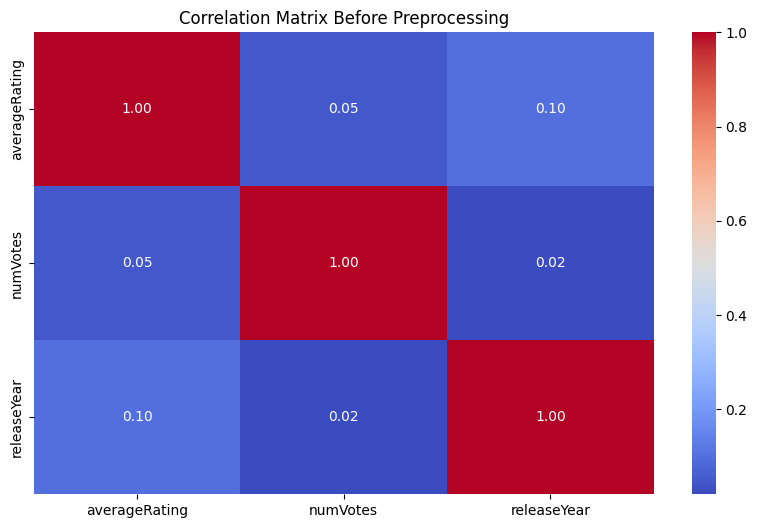

In [ ]:
# 3. Data Preprocessing

# Sadece sayısal sütunları seç
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Korelasyon matrisini oluştur
plt.figure(figsize=(10, 6))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix Before Preprocessing")
plt.show()



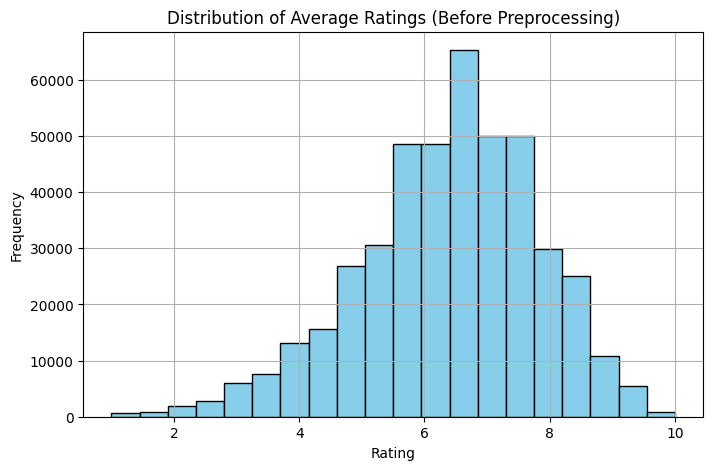

In [ ]:
# Distribution of averageRating (before labeling)
plt.figure(figsize=(8, 5))
data['averageRating'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Average Ratings (Before Preprocessing)")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

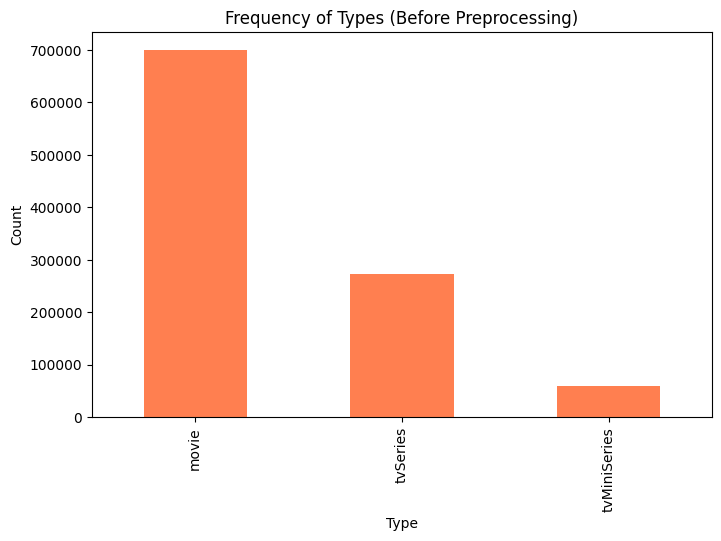

In [ ]:
# Bar plot for 'type' column
plt.figure(figsize=(8, 5))
data['type'].value_counts().plot(kind='bar', color='coral')
plt.title("Frequency of Types (Before Preprocessing)")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

In [ ]:
# Select relevant columns
features = ['type', 'genres', 'averageRating', 'numVotes', 'releaseYear']
data = data[features]


In [ ]:
# Drop rows with missing ratings
data = data.dropna(subset=['averageRating'])

In [ ]:
# Handle missing values
# Replace missing values in 'numVotes' with the median
data['numVotes'] = data['numVotes'].fillna(data['numVotes'].median())

# Replace missing values in 'genres' with "Unknown"
data['genres'] = data['genres'].fillna("Unknown")

# Replace missing values in 'releaseYear' with the median
data['releaseYear'] = data['releaseYear'].fillna(data['releaseYear'].median())

In [ ]:
#LABEL CREATION
# Create labels: Top Rated (1) and Worst Rated (0)
data['label'] = data['averageRating'].apply(lambda x: 1 if x >= 8.0 else (0 if x <= 4.0 else None))

# Drop rows with None labels (middle range ratings)
data = data.dropna(subset=['label'])


In [ ]:
# Step 6: One-Hot Encode 'genres'
# Split the 'genres' column into individual genres and perform one-hot encoding
genre_dummies = data['genres'].str.get_dummies(sep=', ')
data = pd.concat([data, genre_dummies], axis=1)
data = data.drop(columns=['genres'])  # Drop the original 'genres' column

In [ ]:
# Step 7: One-Hot Encode 'type'
# One-hot encode the 'type' column
type_dummies = pd.get_dummies(data['type'], prefix='type', drop_first=True)
data = pd.concat([data, type_dummies], axis=1)
data = data.drop(columns=['type'])  # Drop the original 'type' column


In [ ]:
# Step 8: Normalize Numerical Features
# Normalize 'numVotes' and 'releaseYear'
scaler = MinMaxScaler()
data[['numVotes', 'releaseYear']] = scaler.fit_transform(data[['numVotes', 'releaseYear']])


In [ ]:
# Step 9: Split Data into Features and Target
X = data.drop(columns=['label', 'averageRating'])  # Features
y = data['label']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Confirm preprocessing
print("Preprocessed Data Sample:")
print(data.head())
print("Feature Columns:", X.columns)


Preprocessed Data Sample:
    averageRating  numVotes  releaseYear  label  Action  Adult  Adventure  \
6             3.1  0.000008     0.078740    0.0       0      0          0   
26            3.8  0.000006     0.086614    0.0       0      0          0   
27            3.5  0.000006     0.094488    0.0       0      0          0   
38            3.9  0.000015     0.094488    0.0       0      0          0   
50            3.8  0.000006     0.094488    0.0       0      0          1   

    Animation  Biography  Comedy  ...  Sci-Fi  Short  Sport  Talk-Show  \
6           0          0       0  ...       0      0      0          0   
26          0          0       1  ...       0      0      0          0   
27          0          0       0  ...       0      0      0          0   
38          0          0       0  ...       0      0      0          0   
50          0          0       0  ...       0      0      0          0   

    Thriller  Unknown  War  Western  type_tvMiniSeries  type_tvSer

In [ ]:
# Check for missing values in X_train
missing_values = X_train.isnull().sum()
print("Missing values in each column:\n", missing_values[missing_values > 0])


Missing values in each column:
 Series([], dtype: int64)


# 4. Exploratory Data Analysis (EDA)

Genre Distribution: Identifying the most frequent genres to understand popular trends.
Correlation Analysis: Analyzing relationships between features such as average ratings, number of votes, and release years.
Class Distribution: Visualizing the balance between "Top Rated" and "Worst Rated" titles, ensuring a balanced dataset for training.

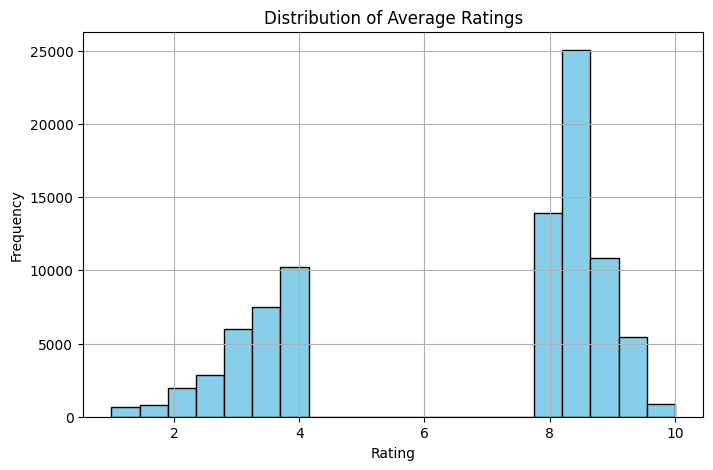

In [ ]:
# Distribution of Average Ratings
plt.figure(figsize=(8, 5))
data['averageRating'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Average Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

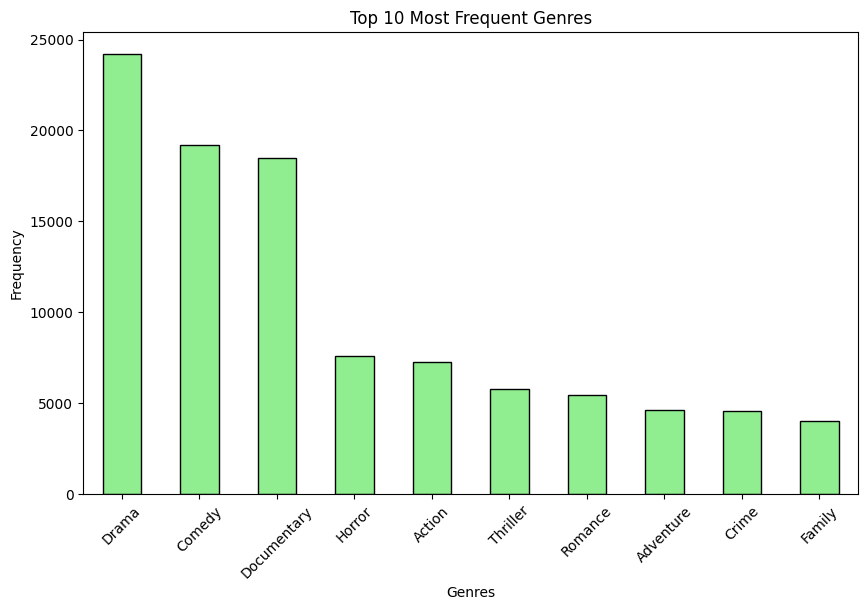

In [ ]:
# Top 10 Most Frequent Genres
genre_counts = genre_dummies.sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
genre_counts.head(10).plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Top 10 Most Frequent Genres")
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

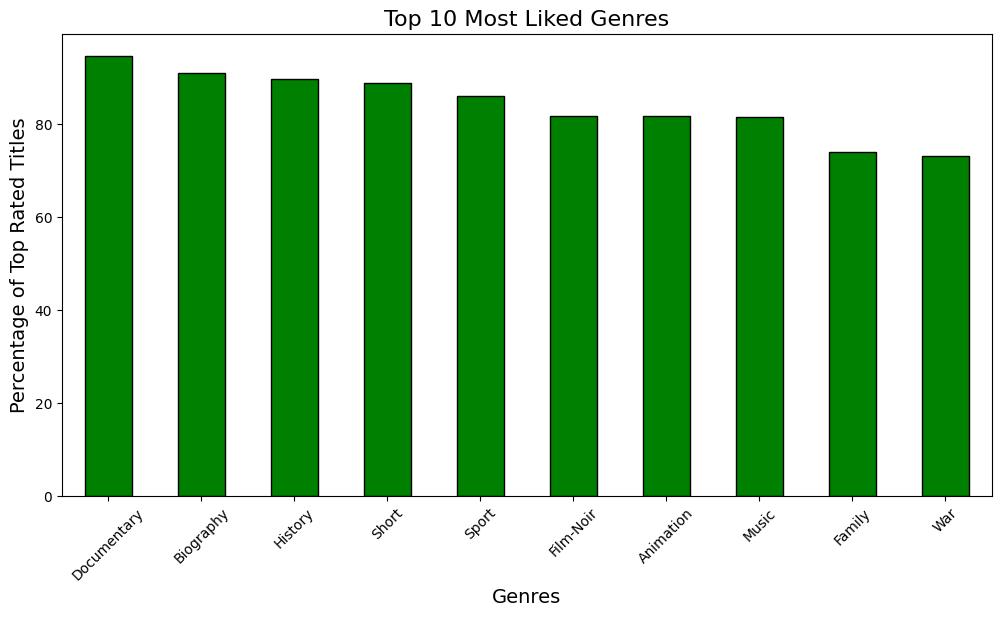

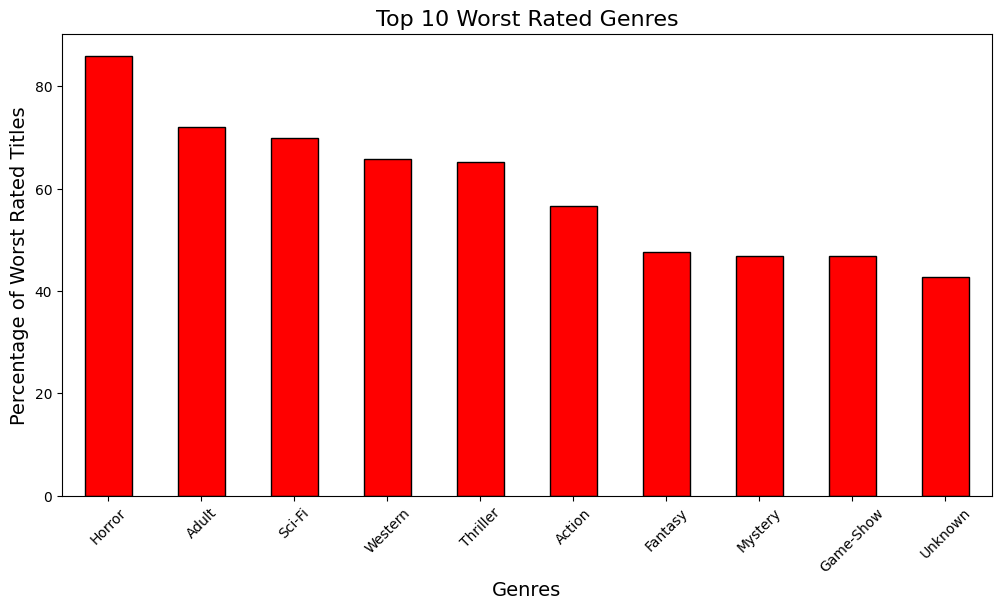

In [ ]:
# Add back labels to the data for grouping
data['label'] = y  # Reattach labels to the processed data

# Calculate the total number of titles in each genre
genre_totals = genre_dummies.sum()

# Calculate the number of "Top Rated" (label=1) and "Worst Rated" (label=0) for each genre
liked_genres = data[data['label'] == 1][genre_dummies.columns].sum()
worst_genres = data[data['label'] == 0][genre_dummies.columns].sum()

# Normalize by genre total to get proportions
liked_genres_percentage = (liked_genres / genre_totals * 100).sort_values(ascending=False)
worst_genres_percentage = (worst_genres / genre_totals * 100).sort_values(ascending=False)

# Plot Most Liked Genres
plt.figure(figsize=(12, 6))
liked_genres_percentage.head(10).plot(kind='bar', color='green', edgecolor='black')
plt.title("Top 10 Most Liked Genres", fontsize=16)
plt.xlabel("Genres", fontsize=14)
plt.ylabel("Percentage of Top Rated Titles", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Plot Worst Rated Genres
plt.figure(figsize=(12, 6))
worst_genres_percentage.head(10).plot(kind='bar', color='red', edgecolor='black')
plt.title("Top 10 Worst Rated Genres", fontsize=16)
plt.xlabel("Genres", fontsize=14)
plt.ylabel("Percentage of Worst Rated Titles", fontsize=14)
plt.xticks(rotation=45)
plt.show()


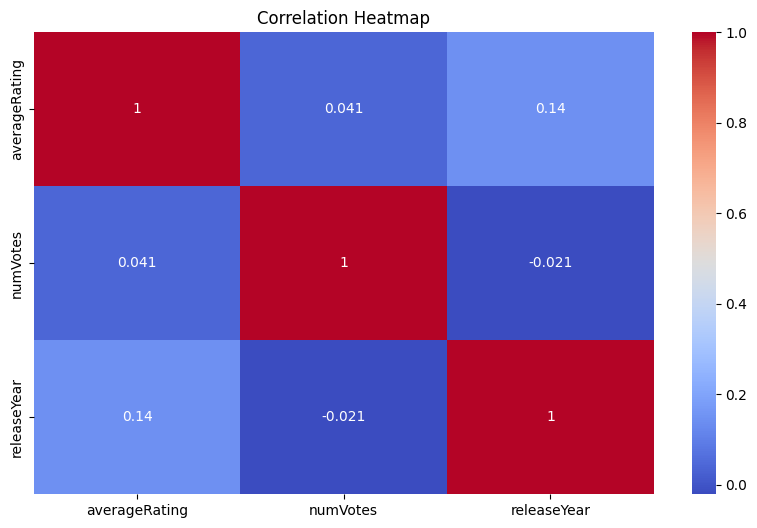

In [ ]:
# Correlation Heatmap for Numerical Features
plt.figure(figsize=(10, 6))
sns.heatmap(data[['averageRating', 'numVotes', 'releaseYear']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 5. Model Deployment
Four machine learning models were implemented to classify IMDb titles:

Logistic Regression: A simple, baseline model that uses linear relationships to classify data.
Random Forest Classifier: An ensemble model that builds multiple decision trees to improve prediction robustness.
Gradient Boosting Classifier: A boosting technique that iteratively enhances weak learners for better accuracy.
MLP Classifier: A neural network with multiple layers designed to capture complex relationships.

Logistic Regression Cross-Validation Accuracy Scores: [0.78847271 0.7846824  0.78185118 0.78794918 0.78511797]
Mean Accuracy (Cross-Validation): 0.7856146864216892

Logistic Regression Performance on Test Set:
Accuracy: 0.7858885017421603

Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.64      0.67      5945
         1.0       0.82      0.87      0.84     11275

    accuracy                           0.79     17220
   macro avg       0.77      0.75      0.76     17220
weighted avg       0.78      0.79      0.78     17220



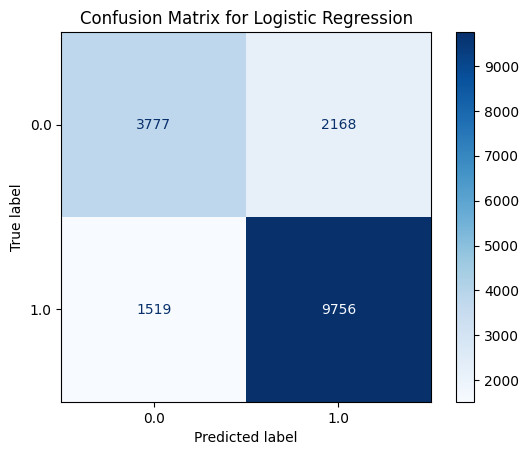

In [ ]:
# Step 1: Define the model
logistic = LogisticRegression(max_iter=1000, random_state=42)

# Step 2: Perform cross-validation
cv_scores = cross_val_score(logistic, X_train, y_train, cv=5, scoring='accuracy')

# Step 3: Print cross-validation results
print("Logistic Regression Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy (Cross-Validation):", np.mean(cv_scores))

# Step 4: Train the model on the entire training set
logistic.fit(X_train, y_train)

# Step 5: Make predictions on the test set
logistic_pred = logistic.predict(X_test)

# Step 6: Evaluate the model on the test set
print("\nLogistic Regression Performance on Test Set:")
print("Accuracy:", accuracy_score(y_test, logistic_pred))
print("\nClassification Report:\n", classification_report(y_test, logistic_pred))

# Step 7: Display the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, logistic_pred, cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


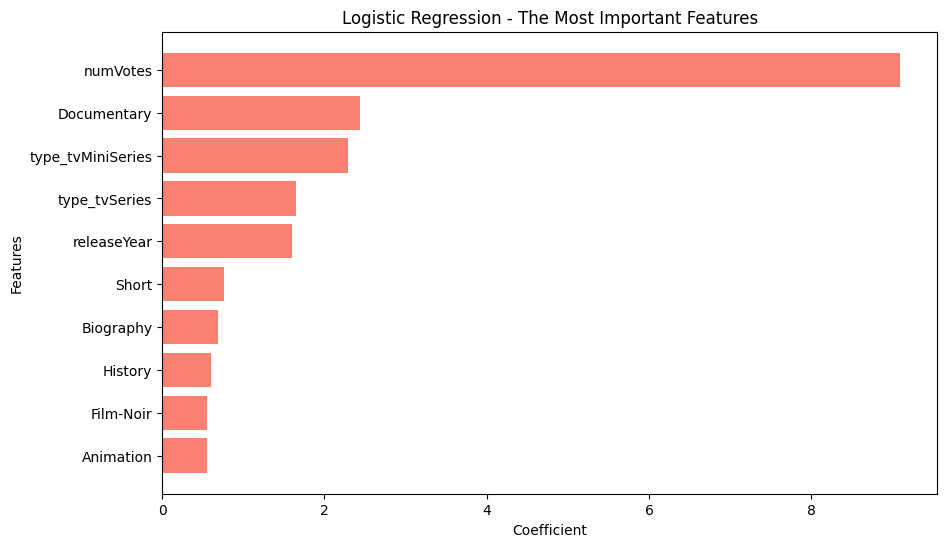

In [ ]:
# Logistic Regression için Katsayı Analizi
logistic = LogisticRegression(max_iter=1000, random_state=42)
logistic.fit(X_train, y_train)

# Katsayıları al
coefficients = logistic.coef_[0]

# Katsayıları görselleştir
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Bar grafiği çiz
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Coefficient'][:10], color='salmon')
plt.xlabel("Coefficient")
plt.ylabel("Features")
plt.title("Logistic Regression - The Most Important Features")
plt.gca().invert_yaxis()
plt.show()


Random Forest Cross-Validation Accuracy Scores: [0.81279036 0.80479129 0.80021779 0.8092922  0.80958258]
Mean Accuracy (Cross-Validation): 0.8073348415192733

Random Forest Classifier Performance on Test Set:
Accuracy: 0.805574912891986

Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.68      0.71      5945
         1.0       0.84      0.87      0.85     11275

    accuracy                           0.81     17220
   macro avg       0.79      0.78      0.78     17220
weighted avg       0.80      0.81      0.80     17220



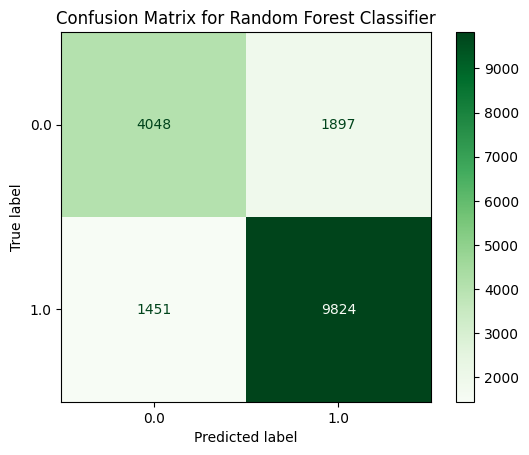

In [ ]:
# Define Random Forest Classifier
rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)

# Perform cross-validation
cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Random Forest Cross-Validation Accuracy Scores:", cv_scores_rf)
print("Mean Accuracy (Cross-Validation):", np.mean(cv_scores_rf))

# Train Random Forest Classifier on the entire training set
rf.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = rf.predict(X_test)

# Evaluate the model on the test set
print("\nRandom Forest Classifier Performance on Test Set:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, rf_pred, cmap=plt.cm.Greens, values_format='d')
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()


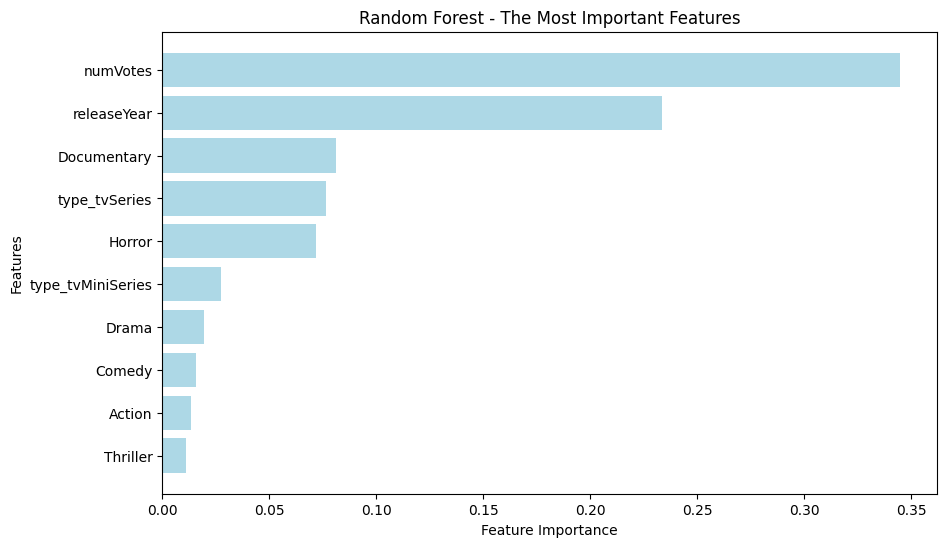

In [ ]:
# Random Forest Feature Importance
feature_importances = rf.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='lightblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest - The Most Important Features")
plt.gca().invert_yaxis()
plt.show()


Gradient Boosting Cross-Validation Accuracy Scores: [0.81743612 0.8153176  0.81096189 0.81814882 0.81401089]
Mean Accuracy (Cross-Validation): 0.8151750644483371

Gradient Boosting Classifier Performance on Test Set:
Accuracy: 0.8147502903600464

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.61      0.70      5945
         1.0       0.82      0.92      0.87     11275

    accuracy                           0.81     17220
   macro avg       0.81      0.77      0.78     17220
weighted avg       0.81      0.81      0.81     17220



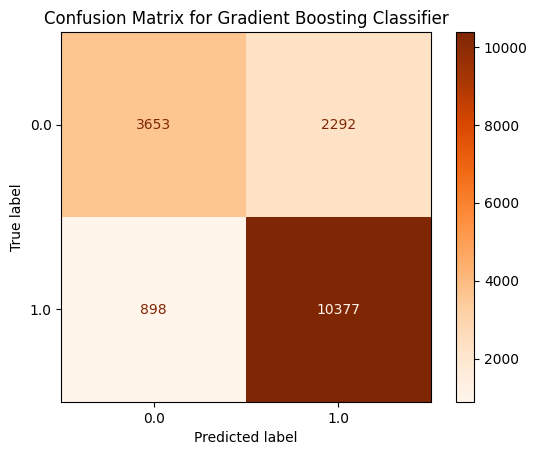

In [ ]:
# Define the Gradient Boosting model
gbc = GradientBoostingClassifier(random_state=42, learning_rate=0.1, n_estimators=100)

# Perform cross-validation
cv_scores = cross_val_score(gbc, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Gradient Boosting Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy (Cross-Validation):", np.mean(cv_scores))

# Train the model on the full training set
gbc.fit(X_train, y_train)

# Make predictions on the test set
gbc_pred = gbc.predict(X_test)

# Evaluate the model
print("\nGradient Boosting Classifier Performance on Test Set:")
print("Accuracy:", accuracy_score(y_test, gbc_pred))
print("\nClassification Report:\n", classification_report(y_test, gbc_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, gbc_pred, cmap=plt.cm.Oranges, values_format='d')
plt.title("Confusion Matrix for Gradient Boosting Classifier")
plt.show()


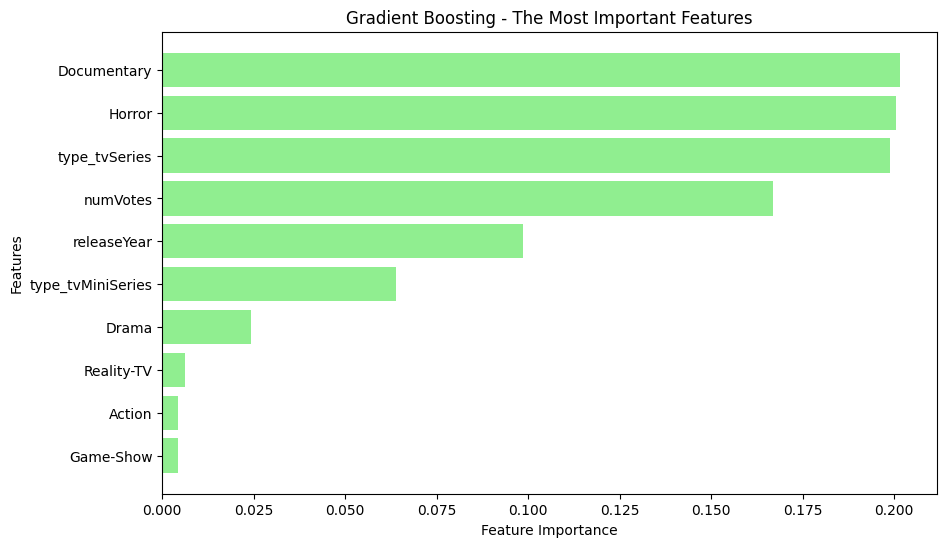

In [ ]:
# Gradient Boosting Feature Importance
gbc = GradientBoostingClassifier(random_state=42, learning_rate=0.1, n_estimators=100)
gbc.fit(X_train, y_train)

feature_importances = gbc.feature_importances_


importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='lightgreen')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Gradient Boosting - The Most Important Features")
plt.gca().invert_yaxis()
plt.show()


MLP Classifier Cross-Validation Accuracy Scores: [0.80865273 0.80166969 0.79898367 0.79912886 0.80297641]
Mean Accuracy (Cross-Validation): 0.8022822700148182

MLP Classifier Performance on Test Set:
Accuracy: 0.8050522648083623

Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.67      0.70      5945
         1.0       0.83      0.88      0.85     11275

    accuracy                           0.81     17220
   macro avg       0.79      0.77      0.78     17220
weighted avg       0.80      0.81      0.80     17220



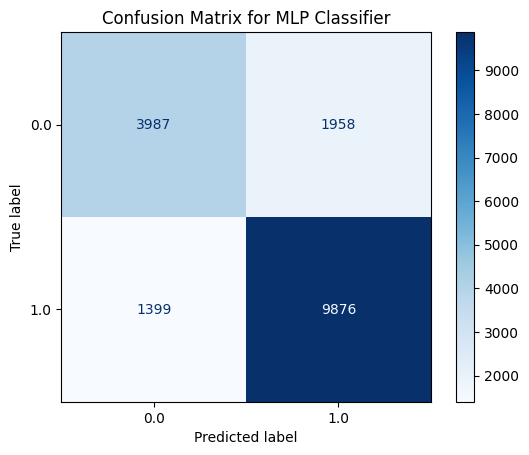

In [ ]:
# Initialize MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', max_iter=1000, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(mlp_clf, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("MLP Classifier Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy (Cross-Validation):", np.mean(cv_scores))

# Fit the model
mlp_clf.fit(X_train, y_train)

# Evaluate on the test set
mlp_pred = mlp_clf.predict(X_test)

# Print metrics
print("\nMLP Classifier Performance on Test Set:")
print("Accuracy:", accuracy_score(y_test, mlp_pred))
print("\nClassification Report:\n", classification_report(y_test, mlp_pred))

# Visualization: Confusion Matrix
ConfusionMatrixDisplay.from_estimator(mlp_clf, X_test, y_test, cmap=plt.cm.Blues)
plt.title("Confusion Matrix for MLP Classifier")
plt.show()


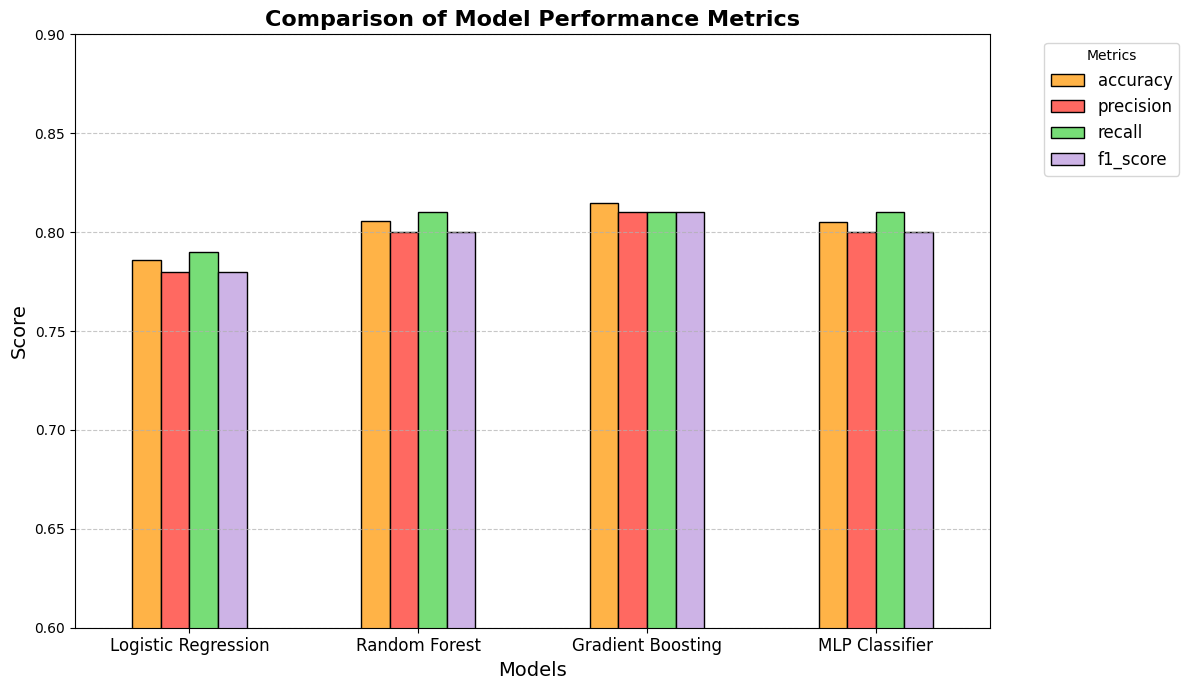

In [ ]:
# Define the updated model metrics
model_metrics = {
    'Logistic Regression': {'accuracy': 0.7859, 'precision': 0.78, 'recall': 0.79, 'f1_score': 0.78},
    'Random Forest': {'accuracy': 0.8056, 'precision': 0.80, 'recall': 0.81, 'f1_score': 0.80},
    'Gradient Boosting': {'accuracy': 0.8148, 'precision': 0.81, 'recall': 0.81, 'f1_score': 0.81},
    'MLP Classifier': {'accuracy': 0.8051, 'precision': 0.80, 'recall': 0.81, 'f1_score': 0.80},
}

# Convert to a DataFrame for plotting
df_metrics = pd.DataFrame(model_metrics).T

# Define custom colors for the chart
custom_colors = ['#FFB347', '#FF6961', '#77DD77', '#CDB3E6']

# Plot grouped bar chart
ax = df_metrics.plot(kind='bar', figsize=(12, 7), color=custom_colors, edgecolor='black')

# Customize the chart
plt.title("Comparison of Model Performance Metrics", fontsize=16, weight='bold')
plt.ylabel("Score", fontsize=14)
plt.xlabel("Models", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.ylim(0.6, 0.9)  # Adjust the y-axis for better visualization
plt.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


# 6. HYPERPARAMETER TUNING
Hyperparameter tuning optimizes the performance of each model by systematically searching for the best parameters using GridSearchCV:

Logistic Regression: Regularization strength and solver were tuned, resulting in marginal improvement.

Random Forest: Tree count, depth, and sample split thresholds were tuned, leading to significant improvement.

Gradient Boosting: Learning rate, number of iterations, and tree depth were optimized, enhancing accuracy.

MLP Classifier: Hidden layer configurations, activation functions, and solvers were explored, but results showed minimal improvement, highlighting the challenge of neural networks on structured datasets.

These steps ensured that models were trained with the best configurations, maximizing their predictive power.

In [ ]:
# Define parameter grid for Logistic Regression
param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Set up GridSearchCV for Logistic Regression
grid_search_logistic = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid=param_grid_logistic,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit the model
grid_search_logistic.fit(X_train, y_train)
best_logistic = grid_search_logistic.best_estimator_
print("Best Parameters for Logistic Regression:", grid_search_logistic.best_params_)
print("Best Accuracy for Logistic Regression:", grid_search_logistic.best_score_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters for Logistic Regression: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy for Logistic Regression: 0.7869214277129277


In [ ]:
# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Set up GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit the model
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Accuracy for Random Forest:", grid_search_rf.best_score_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Best Accuracy for Random Forest: 0.8317265793449272


In [ ]:
# Define parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Set up GridSearchCV for Gradient Boosting
grid_search_gb = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid=param_grid_gb,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit the model
grid_search_gb.fit(X_train, y_train)
best_gb = grid_search_gb.best_estimator_
print("Best Parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best Accuracy for Gradient Boosting:", grid_search_gb.best_score_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Best Accuracy for Gradient Boosting: 0.8308990007264794


In [ ]:
# Define parameter grid for MLPClassifier
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Set up GridSearchCV for MLPClassifier
grid_search_mlp = GridSearchCV(
    MLPClassifier(max_iter=1000, random_state=42),
    param_grid=param_grid_mlp,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit the model
grid_search_mlp.fit(X_train, y_train)
best_mlp = grid_search_mlp.best_estimator_
print("Best Parameters for MLPClassifier:", grid_search_mlp.best_params_)
print("Best Accuracy for MLPClassifier:", grid_search_mlp.best_score_)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters for MLPClassifier: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Best Accuracy for MLPClassifier: 0.804416602562512


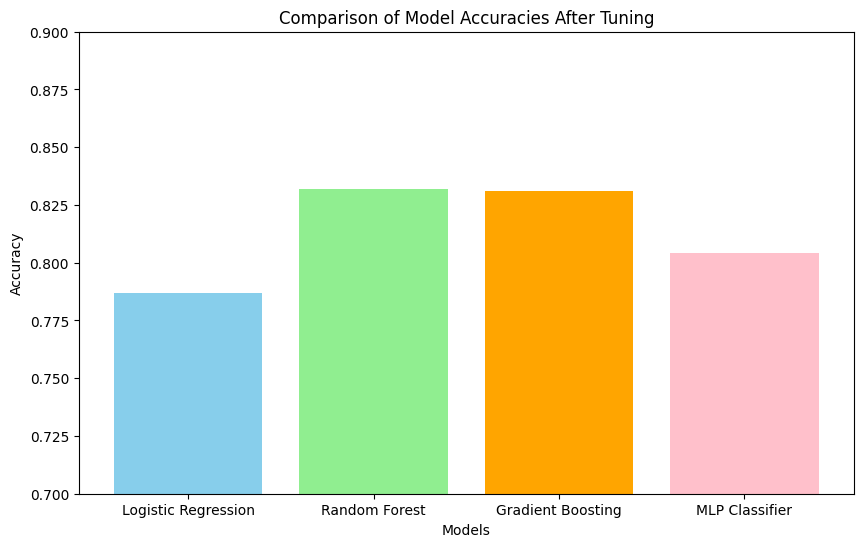

In [ ]:
# Define models and their metrics after tuning
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'MLP Classifier']
accuracies = [grid_search_logistic.best_score_, grid_search_rf.best_score_, grid_search_gb.best_score_, grid_search_mlp.best_score_]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'orange', 'pink'])
plt.title("Comparison of Model Accuracies After Tuning")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.ylim(0.7, 0.9)
plt.show()
